In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/kaggle"

In [3]:
%cd /content/gdrive/My Drive/kaggle

/content/gdrive/My Drive/kaggle


In [11]:
!kaggle datasets download -d mkashifn/nbaiot-dataset

100% 1.75G/1.75G [00:14<00:00, 134MB/s]
100% 1.75G/1.75G [00:14<00:00, 129MB/s]


In [19]:
ls

1.benign.csv          4.mirai.scan.csv      8.gafgyt.scan.csv
1.gafgyt.combo.csv    4.mirai.syn.csv       8.gafgyt.tcp.csv
1.gafgyt.junk.csv     4.mirai.udp.csv       8.gafgyt.udp.csv
1.gafgyt.scan.csv     4.mirai.udpplain.csv  8.mirai.ack.csv
1.gafgyt.tcp.csv      5.benign.csv          8.mirai.scan.csv
1.gafgyt.udp.csv      5.gafgyt.combo.csv    8.mirai.syn.csv
1.mirai.ack.csv       5.gafgyt.junk.csv     8.mirai.udp.csv
1.mirai.scan.csv      5.gafgyt.scan.csv     8.mirai.udpplain.csv
1.mirai.syn.csv       5.gafgyt.tcp.csv      9.benign.csv
1.mirai.udp.csv       5.gafgyt.udp.csv      9.gafgyt.combo.csv
1.mirai.udpplain.csv  5.mirai.ack.csv       9.gafgyt.junk.csv
2.benign.csv          5.mirai.scan.csv      9.gafgyt.scan.csv
2.gafgyt.combo.csv    5.mirai.syn.csv       9.gafgyt.tcp.csv
2.gafgyt.junk.csv     5.mirai.udp.csv       9.gafgyt.udp.csv
2.gafgyt.scan.csv     5.mirai.udpplain.csv  9.mirai.ack.csv
2.gafgyt.tcp.csv      6.benign.csv          9.mirai.scan.csv
2.gafgyt.udp.csv      6

In [13]:
!unzip nbaiot-dataset.zip && rm nbaiot-dataset.zip

Archive:  nbaiot-dataset.zip
  inflating: 1.benign.csv            
  inflating: 1.gafgyt.combo.csv      
  inflating: 1.gafgyt.junk.csv       
  inflating: 1.gafgyt.scan.csv       
  inflating: 1.gafgyt.tcp.csv        
  inflating: 1.gafgyt.udp.csv        
  inflating: 1.mirai.ack.csv         
  inflating: 1.mirai.scan.csv        
  inflating: 1.mirai.syn.csv         
  inflating: 1.mirai.udp.csv         
  inflating: 1.mirai.udpplain.csv    
  inflating: 2.benign.csv            
  inflating: 2.gafgyt.combo.csv      
  inflating: 2.gafgyt.junk.csv       
  inflating: 2.gafgyt.scan.csv       
  inflating: 2.gafgyt.tcp.csv        
  inflating: 2.gafgyt.udp.csv        
  inflating: 2.mirai.ack.csv         
  inflating: 2.mirai.scan.csv        
  inflating: 2.mirai.syn.csv         
  inflating: 2.mirai.udp.csv         
  inflating: 2.mirai.udpplain.csv    
  inflating: 3.benign.csv            
  inflating: 3.gafgyt.combo.csv      
  inflating: 3.gafgyt.junk.csv       
  inflating: 3.gafgyt

In [15]:
# Imports

########################################################################
# Python Standard Libraries
import os

########################################################################
# Numpy Library
import numpy as np # linear algebra

########################################################################
# Pandas Library
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

########################################################################
# MATPLOT Library
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

########################################################################
# SKLearn Library
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [21]:
# Utility functions

########################################################################
# Walk through input files
def print_input_files():
    # Input data files are available in the "../input/" directory.
    for dirname, _, filenames in os.walk('/content/gdrive/My Drive/kaggle'):
        for filename in filenames:
            print(os.path.join(dirname, filename))

########################################################################
# Dump text files
def dump_text_file(fname):
    with open(fname, 'r') as f:
        print(f.read())

########################################################################
# Dump CSV files
def dump_csv_file(fname, count=5):
    # count: 0 - column names only, -1 - all rows, default = 5 rows max
    df = pd.read_csv(fname)
    if count < 0:
        count = df.shape[0]
    return df.head(count)

########################################################################
# Dataset related functions
ds_nbaiot = '/content/gdrive/My Drive/kaggle'
dn_nbaiot = ['Danmini_Doorbell', 'Ecobee_Thermostat', 'Ennio_Doorbell', 'Philips_B120N10_Baby_Monitor', 'Provision_PT_737E_Security_Camera', 'Provision_PT_838_Security_Camera', 'Samsung_SNH_1011_N_Webcam', 'SimpleHome_XCS7_1002_WHT_Security_Camera', 'SimpleHome_XCS7_1003_WHT_Security_Camera']

def fname(ds, f):
    if '.csv' not in f:
        f = f'{f}.csv'
    return os.path.join(ds, f)

def fname_nbaiot(f):
    return fname(ds_nbaiot, f)

def get_nbaiot_device_files():
    nbaiot_all_files = dump_csv_file(fname_nbaiot('data_summary'), -1)
    nbaiot_all_files = nbaiot_all_files.iloc[:,0:1].values
    device_id = 1
    indices = []
    for j in range(len(nbaiot_all_files)):
        if str(device_id) not in str(nbaiot_all_files[j]):
            indices.append(j)
            device_id += 1
    nbaiot_device_files = np.split(nbaiot_all_files, indices)
    return nbaiot_device_files

def get_nbaiot_device_data(device_id):
    if device_id < 1 or device_id > 9:
        assert False, "Please provide a valid device ID 1-9, both inclusive"
    device_index = device_id -1
    device_files = get_nbaiot_device_files()
    device_file = device_files[device_index]
    df = pd.DataFrame()
    y = []
    for i in range(len(device_file)):
        fname = str(device_file[i][0])
        df_c = pd.read_csv(fname_nbaiot(fname))
        rows = df_c.shape[0]
        print("processing", fname, "rows =", rows)
        y_np = np.ones(rows) if 'benign' in fname else np.zeros(rows)
        y.extend(y_np.tolist())
        df = pd.concat([df.iloc[:,:].reset_index(drop=True),
                      df_c.iloc[:,:].reset_index(drop=True)], axis=0)
    X = df.iloc[:,:].values
    y = np.array(y)
    return (X, y)

def get_nbaiot_devices_data():
    devices_data = []
    for i in range(9):
        device_id = i + 1
        (X, y) = get_nbaiot_device_data(device_id)
        devices_data.append((X, y))
    return devices_data
#print_input_files()

def plot_scatter_nbaiot_device(device_data, device_id):
    if device_id < 1 or device_id > 9:
        assert False, "Please provide a valid device ID 1-9, both inclusive"
    device_index = device_id-1
    print("scatter plot for", dn_nbaiot[device_index])
    (X, y) = device_data
    X_std = StandardScaler().fit_transform(X)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_std)
    data_X = X_pca[:,0]
    data_Y = X_pca[:,1]
    data_Z = y
    data = np.column_stack((data_X, data_Y, data_Z))
    plot_3d_scatter(data)

########################################################################
# Visualization related functions
def plot_3d_histogram(data):
    cols = data.shape[1]
    if cols < 2:
        assert False, 'The number of columns should be 2'
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    X = data[:,0]
    Y = data[:,1]
    bins = 10
    hist, xedges, yedges = np.histogram2d(X, Y, bins=bins, range=[[0, bins*0.6], [0, bins*0.6]])

    # Construct arrays for the anchor positions of the bars.
    xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = 0

    # Construct arrays with the dimensions for the 16 bars.
    dx = dy = 0.5 * np.ones_like(zpos)
    dz = hist.ravel()

    cmap = cm.get_cmap('cool')
    max_height = np.max(dz)
    min_height = np.min(dz)
    rgba = [cmap((k-min_height)/max_height) for k in dz] 
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', color=rgba)

    plt.show()

def plot_3d_surface(data, func):
    cols = data.shape[1]
    if cols < 2:
        assert False, 'The number of columns should be 2'
    X = data[:,0]
    Y = data[:,1]
    X, Y = np.meshgrid(X, Y)
    Z = func(X, Y)
    #print(Z.shape)
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    ax.set_title('surface');

def plot_3d_scatter(data, title=None, xlabel=None, ylabel=None, zlabel=None):
    cols = data.shape[1]
    if cols < 3:
        assert False, 'The number of columns should be 3'
    X = data[:,0]
    Y = data[:,1]
    Z = data[:,2]
    ax = plt.axes(projection='3d')
    ax.scatter(X, Y, Z, c = Z, cmap='RdYlGn')
    ax.set_title(title);
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    plt.show()

def plot_2d_scatter(data, title=None, xlabel=None, ylabel=None, handles=None):
    cols = data.shape[1]
    if cols < 3:
        assert False, 'The number of columns should be 3'
    X = data[:,0]
    Y = data[:,1]
    Z = data[:,2]
    ax = plt.axes()
    scatter = ax.scatter(X, Y, c = ['green' if z > 0.5 else 'red' for z in Z], cmap='RdYlGn')
    ax.set_title(title);
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.legend(handles=handles)
    plt.show()

In [22]:
def plot_scatter_nbaiot_devices(dim3=True):
    for i in range(9):
        device_id = i + 1
        device_index = i
        device_data = get_nbaiot_device_data(device_id)
        (X, y) = device_data
        X_std = StandardScaler().fit_transform(X)
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_std)
        data_X = X_pca[:,0]
        data_Y = X_pca[:,1]
        data_Z = y
        data = np.column_stack((data_X, data_Y, data_Z))
        if dim3:
            plot_3d_scatter(data, dn_nbaiot[device_index], 'PCA1', 'PCA2', 'Normal or Anomalous')
        else:
            normal = mpatches.Patch(color='green', label='N')
            anomalous = mpatches.Patch(color='red', label='A')
            handles = [normal, anomalous]
            plot_2d_scatter(data, dn_nbaiot[device_index], 'PCA1', 'PCA2', handles)

processing 1.benign.csv rows = 49548
processing 1.gafgyt.combo.csv rows = 59718
processing 1.gafgyt.junk.csv rows = 29068
processing 1.gafgyt.scan.csv rows = 29849
processing 1.gafgyt.tcp.csv rows = 92141
processing 1.gafgyt.udp.csv rows = 105874
processing 1.mirai.ack.csv rows = 102195
processing 1.mirai.scan.csv rows = 107685
processing 1.mirai.syn.csv rows = 122573
processing 1.mirai.udp.csv rows = 237665
processing 1.mirai.udpplain.csv rows = 81982


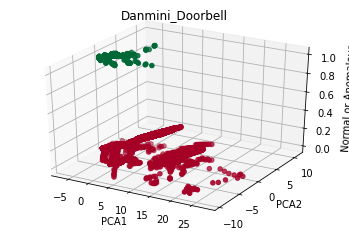

processing 2.benign.csv rows = 13113
processing 2.gafgyt.combo.csv rows = 53012
processing 2.gafgyt.junk.csv rows = 30312
processing 2.gafgyt.scan.csv rows = 27494
processing 2.gafgyt.tcp.csv rows = 95021
processing 2.gafgyt.udp.csv rows = 104791
processing 2.mirai.ack.csv rows = 113285
processing 2.mirai.scan.csv rows = 43192
processing 2.mirai.syn.csv rows = 116807
processing 2.mirai.udp.csv rows = 151481
processing 2.mirai.udpplain.csv rows = 87368


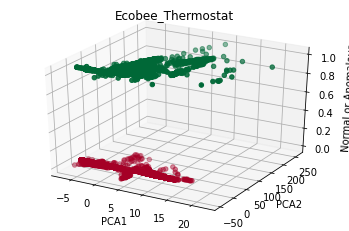

processing 3.benign.csv rows = 39100
processing 3.gafgyt.combo.csv rows = 53014
processing 3.gafgyt.junk.csv rows = 29797
processing 3.gafgyt.scan.csv rows = 28120
processing 3.gafgyt.tcp.csv rows = 101536
processing 3.gafgyt.udp.csv rows = 103933


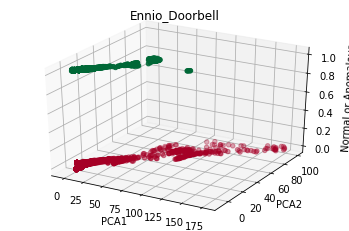

processing 4.benign.csv rows = 175240
processing 4.gafgyt.combo.csv rows = 58152
processing 4.gafgyt.junk.csv rows = 28349
processing 4.gafgyt.scan.csv rows = 27859
processing 4.gafgyt.tcp.csv rows = 92581
processing 4.gafgyt.udp.csv rows = 105782
processing 4.mirai.ack.csv rows = 91123
processing 4.mirai.scan.csv rows = 103621
processing 4.mirai.syn.csv rows = 118128
processing 4.mirai.udp.csv rows = 217034
processing 4.mirai.udpplain.csv rows = 80808


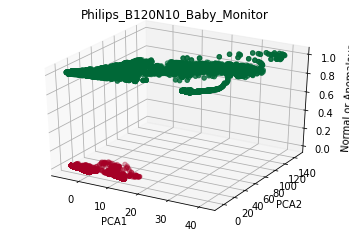

processing 5.benign.csv rows = 62154
processing 5.gafgyt.combo.csv rows = 61380
processing 5.gafgyt.junk.csv rows = 30898
processing 5.gafgyt.scan.csv rows = 29297
processing 5.gafgyt.tcp.csv rows = 104510
processing 5.gafgyt.udp.csv rows = 104011
processing 5.mirai.ack.csv rows = 60554
processing 5.mirai.scan.csv rows = 96781
processing 5.mirai.syn.csv rows = 65746
processing 5.mirai.udp.csv rows = 156248
processing 5.mirai.udpplain.csv rows = 56681


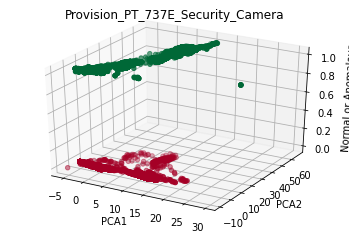

processing 6.benign.csv rows = 98514
processing 6.gafgyt.combo.csv rows = 57530
processing 6.gafgyt.junk.csv rows = 29068
processing 6.gafgyt.scan.csv rows = 28397
processing 6.gafgyt.tcp.csv rows = 89387
processing 6.gafgyt.udp.csv rows = 104658
processing 6.mirai.ack.csv rows = 57997
processing 6.mirai.scan.csv rows = 97096
processing 6.mirai.syn.csv rows = 61851
processing 6.mirai.udp.csv rows = 158608
processing 6.mirai.udpplain.csv rows = 53785


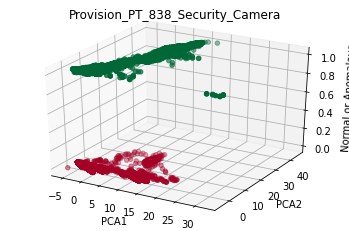

processing 7.benign.csv rows = 52150
processing 7.gafgyt.combo.csv rows = 58669
processing 7.gafgyt.junk.csv rows = 28305
processing 7.gafgyt.scan.csv rows = 27698
processing 7.gafgyt.tcp.csv rows = 97783
processing 7.gafgyt.udp.csv rows = 110617


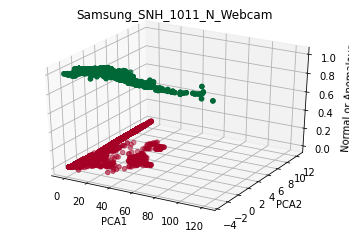

processing 8.benign.csv rows = 46585
processing 8.gafgyt.combo.csv rows = 54283
processing 8.gafgyt.junk.csv rows = 28579
processing 8.gafgyt.scan.csv rows = 27825
processing 8.gafgyt.tcp.csv rows = 88816
processing 8.gafgyt.udp.csv rows = 103720
processing 8.mirai.ack.csv rows = 111480
processing 8.mirai.scan.csv rows = 45930
processing 8.mirai.syn.csv rows = 125715
processing 8.mirai.udp.csv rows = 151879
processing 8.mirai.udpplain.csv rows = 78244


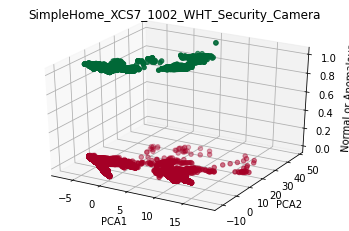

processing 9.benign.csv rows = 19528
processing 9.gafgyt.combo.csv rows = 59398
processing 9.gafgyt.junk.csv rows = 27413
processing 9.gafgyt.scan.csv rows = 28572
processing 9.gafgyt.tcp.csv rows = 98075
processing 9.gafgyt.udp.csv rows = 102980
processing 9.mirai.ack.csv rows = 107187
processing 9.mirai.scan.csv rows = 43674
processing 9.mirai.syn.csv rows = 122479
processing 9.mirai.udp.csv rows = 157084
processing 9.mirai.udpplain.csv rows = 84436


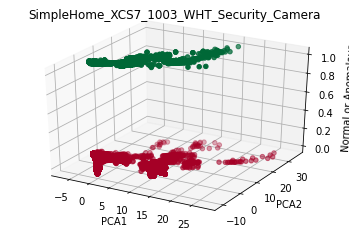

In [23]:
plot_scatter_nbaiot_devices() # 3D Scatter Plots

processing 1.benign.csv rows = 49548
processing 1.gafgyt.combo.csv rows = 59718
processing 1.gafgyt.junk.csv rows = 29068
processing 1.gafgyt.scan.csv rows = 29849
processing 1.gafgyt.tcp.csv rows = 92141
processing 1.gafgyt.udp.csv rows = 105874
processing 1.mirai.ack.csv rows = 102195
processing 1.mirai.scan.csv rows = 107685
processing 1.mirai.syn.csv rows = 122573
processing 1.mirai.udp.csv rows = 237665
processing 1.mirai.udpplain.csv rows = 81982


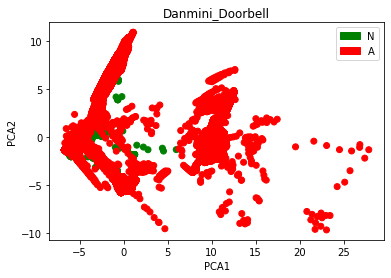

processing 2.benign.csv rows = 13113
processing 2.gafgyt.combo.csv rows = 53012
processing 2.gafgyt.junk.csv rows = 30312
processing 2.gafgyt.scan.csv rows = 27494
processing 2.gafgyt.tcp.csv rows = 95021
processing 2.gafgyt.udp.csv rows = 104791
processing 2.mirai.ack.csv rows = 113285
processing 2.mirai.scan.csv rows = 43192
processing 2.mirai.syn.csv rows = 116807
processing 2.mirai.udp.csv rows = 151481
processing 2.mirai.udpplain.csv rows = 87368


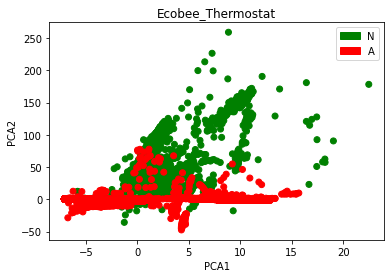

processing 3.benign.csv rows = 39100
processing 3.gafgyt.combo.csv rows = 53014
processing 3.gafgyt.junk.csv rows = 29797
processing 3.gafgyt.scan.csv rows = 28120
processing 3.gafgyt.tcp.csv rows = 101536
processing 3.gafgyt.udp.csv rows = 103933


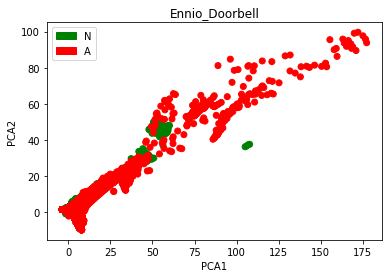

processing 4.benign.csv rows = 175240
processing 4.gafgyt.combo.csv rows = 58152
processing 4.gafgyt.junk.csv rows = 28349
processing 4.gafgyt.scan.csv rows = 27859
processing 4.gafgyt.tcp.csv rows = 92581
processing 4.gafgyt.udp.csv rows = 105782
processing 4.mirai.ack.csv rows = 91123
processing 4.mirai.scan.csv rows = 103621
processing 4.mirai.syn.csv rows = 118128
processing 4.mirai.udp.csv rows = 217034
processing 4.mirai.udpplain.csv rows = 80808


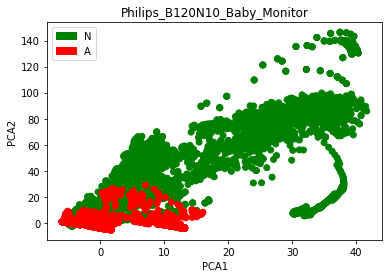

processing 5.benign.csv rows = 62154
processing 5.gafgyt.combo.csv rows = 61380
processing 5.gafgyt.junk.csv rows = 30898
processing 5.gafgyt.scan.csv rows = 29297
processing 5.gafgyt.tcp.csv rows = 104510
processing 5.gafgyt.udp.csv rows = 104011
processing 5.mirai.ack.csv rows = 60554
processing 5.mirai.scan.csv rows = 96781
processing 5.mirai.syn.csv rows = 65746
processing 5.mirai.udp.csv rows = 156248
processing 5.mirai.udpplain.csv rows = 56681


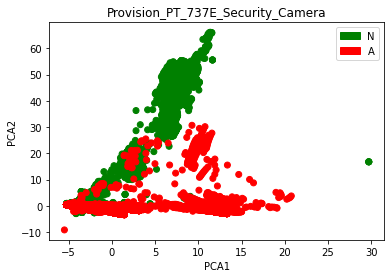

processing 6.benign.csv rows = 98514
processing 6.gafgyt.combo.csv rows = 57530
processing 6.gafgyt.junk.csv rows = 29068
processing 6.gafgyt.scan.csv rows = 28397
processing 6.gafgyt.tcp.csv rows = 89387
processing 6.gafgyt.udp.csv rows = 104658
processing 6.mirai.ack.csv rows = 57997
processing 6.mirai.scan.csv rows = 97096
processing 6.mirai.syn.csv rows = 61851
processing 6.mirai.udp.csv rows = 158608
processing 6.mirai.udpplain.csv rows = 53785


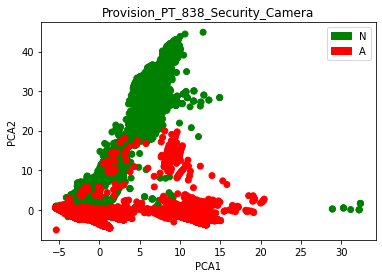

processing 7.benign.csv rows = 52150
processing 7.gafgyt.combo.csv rows = 58669
processing 7.gafgyt.junk.csv rows = 28305
processing 7.gafgyt.scan.csv rows = 27698
processing 7.gafgyt.tcp.csv rows = 97783
processing 7.gafgyt.udp.csv rows = 110617


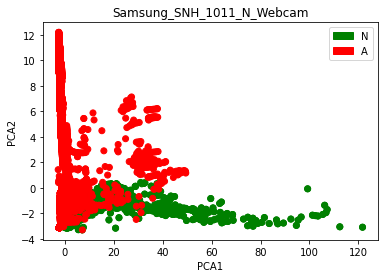

processing 8.benign.csv rows = 46585
processing 8.gafgyt.combo.csv rows = 54283
processing 8.gafgyt.junk.csv rows = 28579
processing 8.gafgyt.scan.csv rows = 27825
processing 8.gafgyt.tcp.csv rows = 88816
processing 8.gafgyt.udp.csv rows = 103720
processing 8.mirai.ack.csv rows = 111480
processing 8.mirai.scan.csv rows = 45930
processing 8.mirai.syn.csv rows = 125715
processing 8.mirai.udp.csv rows = 151879
processing 8.mirai.udpplain.csv rows = 78244


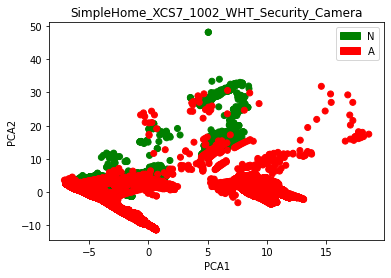

processing 9.benign.csv rows = 19528
processing 9.gafgyt.combo.csv rows = 59398
processing 9.gafgyt.junk.csv rows = 27413
processing 9.gafgyt.scan.csv rows = 28572
processing 9.gafgyt.tcp.csv rows = 98075
processing 9.gafgyt.udp.csv rows = 102980
processing 9.mirai.ack.csv rows = 107187
processing 9.mirai.scan.csv rows = 43674
processing 9.mirai.syn.csv rows = 122479
processing 9.mirai.udp.csv rows = 157084
processing 9.mirai.udpplain.csv rows = 84436


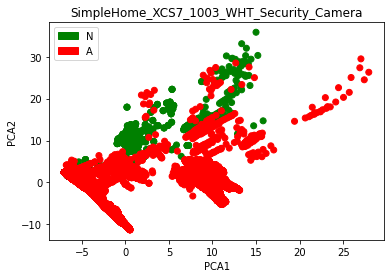

In [24]:
plot_scatter_nbaiot_devices(False) # 2D Scatter Plots

In [53]:
benign=pd.read_csv('/content/gdrive/My Drive/kaggle/5.benign.csv')
g_c=pd.read_csv('/content/gdrive/My Drive/kaggle/5.gafgyt.combo.csv')
g_j=pd.read_csv('/content/gdrive/My Drive/kaggle/5.gafgyt.junk.csv')
g_s=pd.read_csv('/content/gdrive/My Drive/kaggle/5.gafgyt.scan.csv')
g_t=pd.read_csv('/content/gdrive/My Drive/kaggle/5.gafgyt.tcp.csv')
g_u=pd.read_csv('/content/gdrive/My Drive/kaggle/5.gafgyt.udp.csv')
m_a=pd.read_csv('/content/gdrive/My Drive/kaggle/5.mirai.ack.csv')
m_sc=pd.read_csv('/content/gdrive/My Drive/kaggle/5.mirai.scan.csv')
m_sy=pd.read_csv('/content/gdrive/My Drive/kaggle/5.mirai.syn.csv')
m_u=pd.read_csv('/content/gdrive/My Drive/kaggle/5.mirai.udp.csv')
m_u_p=pd.read_csv('/content/gdrive/My Drive/kaggle/5.mirai.udpplain.csv')

benign=benign.sample(frac=0.25,replace=False)
g_c=g_c.sample(frac=0.25,replace=False)
g_j=g_j.sample(frac=0.5,replace=False)
g_s=g_s.sample(frac=0.5,replace=False)
g_t=g_t.sample(frac=0.15,replace=False)
g_u=g_u.sample(frac=0.15,replace=False)
m_a=m_a.sample(frac=0.25,replace=False)
m_sc=m_sc.sample(frac=0.15,replace=False)
m_sy=m_sy.sample(frac=0.25,replace=False)
m_u=m_u.sample(frac=0.1,replace=False)
m_u_p=m_u_p.sample(frac=0.27,replace=False)

benign['type']='benign'
m_u['type']='mirai_udp'
g_c['type']='gafgyt_combo'
g_j['type']='gafgyt_junk'
g_s['type']='gafgyt_scan'
g_t['type']='gafgyt_tcp'
g_u['type']='gafgyt_udp'
m_a['type']='mirai_ack'
m_sc['type']='mirai_scan'
m_sy['type']='mirai_syn'
m_u_p['type']='mirai_udpplain'

data=pd.concat([benign,m_u,g_c,g_j,g_s,g_t,g_u,m_a,m_sc,m_sy,m_u_p],
               axis=0, sort=False, ignore_index=True)

In [54]:
#how many instances of each class
data.groupby('type')['type'].count()

type
benign            15538
gafgyt_combo      15345
gafgyt_junk       15449
gafgyt_scan       14648
gafgyt_tcp        15676
gafgyt_udp        15602
mirai_ack         15138
mirai_scan        14517
mirai_syn         16436
mirai_udp         15625
mirai_udpplain    15304
Name: type, dtype: int64

In [55]:
#shuffle rows of dataframe 
sampler=np.random.permutation(len(data))
data=data.take(sampler)
data.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,MI_dir_L0.01_weight,MI_dir_L0.01_mean,MI_dir_L0.01_variance,H_L5_weight,H_L5_mean,H_L5_variance,H_L3_weight,H_L3_mean,H_L3_variance,H_L1_weight,H_L1_mean,H_L1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,H_L0.01_weight,H_L0.01_mean,H_L0.01_variance,HH_L5_weight,HH_L5_mean,HH_L5_std,HH_L5_magnitude,HH_L5_radius,HH_L5_covariance,HH_L5_pcc,HH_L3_weight,HH_L3_mean,HH_L3_std,...,HH_jit_L0.1_variance,HH_jit_L0.01_weight,HH_jit_L0.01_mean,HH_jit_L0.01_variance,HpHp_L5_weight,HpHp_L5_mean,HpHp_L5_std,HpHp_L5_magnitude,HpHp_L5_radius,HpHp_L5_covariance,HpHp_L5_pcc,HpHp_L3_weight,HpHp_L3_mean,HpHp_L3_std,HpHp_L3_magnitude,HpHp_L3_radius,HpHp_L3_covariance,HpHp_L3_pcc,HpHp_L1_weight,HpHp_L1_mean,HpHp_L1_std,HpHp_L1_magnitude,HpHp_L1_radius,HpHp_L1_covariance,HpHp_L1_pcc,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,type
109574,119.436174,263.429619,61534.827676,176.542432,274.418002,62496.851674,389.180550,304.906230,63916.829041,3529.899783,328.515446,63742.031255,20797.313340,337.094147,63405.281912,119.436174,263.429619,61534.827676,176.542432,274.418002,62496.851674,389.180550,304.906230,63916.829041,3529.899783,328.515446,63742.031255,20797.313340,337.094147,63405.281912,48.009383,566.0,0.000019,566.000000,3.492460e-10,0.000000e+00,0.000000e+00,74.793274,566.000000,0.000020,...,9.943013e+10,11402.509646,5.160395e+04,7.779843e+13,1.0,566.0,0.0,566.000000,0.0,0.0,0.0,1.0,566.0,0.0,566.000000,0.0,0.0,0.0,1.0,566.0,0.0,566.000000,0.000000e+00,0.000000e+00,0.0,1.000000,566.0,0.000000e+00,566.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.00000,566.0,0.000000e+00,566.000000,0.000000e+00,0.000000e+00,0.000000e+00,mirai_ack
14254,1.000000,60.000000,0.000005,1.000029,60.000374,0.004856,1.030630,60.386357,4.873383,2.490850,69.761923,134.027184,24.790052,74.148195,261.608278,1.000000,60.000000,0.000005,1.000029,60.000374,0.004856,1.030630,60.386357,4.873383,2.490850,69.761923,134.027184,24.790052,74.148195,261.608278,1.000000,60.0,0.002135,84.852815,9.830000e-05,5.770000e-13,2.730000e-08,1.000029,60.000374,0.069687,...,1.567343e+02,8.205826,1.986187e+01,3.306978e+02,1.0,60.0,0.0,84.852814,0.0,0.0,0.0,1.0,60.0,0.0,84.852814,0.0,0.0,0.0,1.0,60.0,0.0,84.852814,4.550000e-13,1.820000e-48,0.0,1.235925,60.0,6.740000e-07,84.852814,1.020000e-12,4.080000e-29,6.350000e-17,5.33297,60.0,6.740000e-07,84.852814,1.440000e-12,2.110000e-29,2.680000e-17,benign
84401,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,60.000000,0.000000,...,0.000000e+00,1.000000,1.505914e+09,0.000000e+00,1.0,60.0,0.0,60.000000,0.0,0.0,0.0,1.0,60.0,0.0,60.000000,0.0,0.0,0.0,1.0,60.0,0.0,60.000000,0.000000e+00,0.000000e+00,0.0,1.000000,60.0,0.000000e+00,60.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.00000,60.0,0.000000e+00,60.000000,0.000000e+00,0.000000e+00,0.000000e+00,gafgyt_tcp
55181,183.560973,74.029869,2.640045,296.178626,74.092213,48.214556,848.059534,74.904024,714.991666,7358.991227,74.992525,737.235564,23426.392702,74.525511,366.859564,183.560973,74.029869,2.640045,296.178626,74.092213,48.214556,848.059534,74.904024,714.991666,7358.991227,74.992525,737.235564,23426.392702,74.525511,366.859564,183.350146,74.0,0.000018,95.268043,3.129220e-10,2.017094e-24,4.690186e-14,295.720684,74.000000,0.001116,...,8.929521e+12,23350.463659,4.524320e+04,6.813031e+13,1.0,74.0,

In [56]:
#dummy encode labels, store separately
labels_full=pd.get_dummies(data['type'], prefix='type')
labels_full.head()

,type_benign,type_gafgyt_combo,type_gafgyt_junk,type_gafgyt_scan,type_gafgyt_tcp,type_gafgyt_udp,type_mirai_ack,type_mirai_scan,type_mirai_syn,type_mirai_udp,type_mirai_udpplain
109574,0,0,0,0,0,0,1,0,0,0,0
14254,1,0,0,0,0,0,0,0,0,0,0
84401,0,0,0,0,1,0,0,0,0,0,0
55181,0,0,1,0,0,0,0,0,0,0,0
29405,0,0,0,0,0,0,0,0,0,1,0


In [57]:
#drop labels from training dataset
data=data.drop(columns='type')
data.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,MI_dir_L0.01_weight,MI_dir_L0.01_mean,MI_dir_L0.01_variance,H_L5_weight,H_L5_mean,H_L5_variance,H_L3_weight,H_L3_mean,H_L3_variance,H_L1_weight,H_L1_mean,H_L1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,H_L0.01_weight,H_L0.01_mean,H_L0.01_variance,HH_L5_weight,HH_L5_mean,HH_L5_std,HH_L5_magnitude,HH_L5_radius,HH_L5_covariance,HH_L5_pcc,HH_L3_weight,HH_L3_mean,HH_L3_std,...,HH_jit_L0.1_mean,HH_jit_L0.1_variance,HH_jit_L0.01_weight,HH_jit_L0.01_mean,HH_jit_L0.01_variance,HpHp_L5_weight,HpHp_L5_mean,HpHp_L5_std,HpHp_L5_magnitude,HpHp_L5_radius,HpHp_L5_covariance,HpHp_L5_pcc,HpHp_L3_weight,HpHp_L3_mean,HpHp_L3_std,HpHp_L3_magnitude,HpHp_L3_radius,HpHp_L3_covariance,HpHp_L3_pcc,HpHp_L1_weight,HpHp_L1_mean,HpHp_L1_std,HpHp_L1_magnitude,HpHp_L1_radius,HpHp_L1_covariance,HpHp_L1_pcc,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
109574,119.436174,263.429619,61534.827676,176.542432,274.418002,62496.851674,389.180550,304.906230,63916.829041,3529.899783,328.515446,63742.031255,20797.313340,337.094147,63405.281912,119.436174,263.429619,61534.827676,176.542432,274.418002,62496.851674,389.180550,304.906230,63916.829041,3529.899783,328.515446,63742.031255,20797.313340,337.094147,63405.281912,48.009383,566.0,0.000019,566.000000,3.492460e-10,0.000000e+00,0.000000e+00,74.793274,566.000000,0.000020,...,6.595790e+01,9.943013e+10,11402.509646,5.160395e+04,7.779843e+13,1.0,566.0,0.0,566.000000,0.0,0.0,0.0,1.0,566.0,0.0,566.000000,0.0,0.0,0.0,1.0,566.0,0.0,566.000000,0.000000e+00,0.000000e+00,0.0,1.000000,566.0,0.000000e+00,566.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.00000,566.0,0.000000e+00,566.000000,0.000000e+00,0.000000e+00,0.000000e+00
14254,1.000000,60.000000,0.000005,1.000029,60.000374,0.004856,1.030630,60.386357,4.873383,2.490850,69.761923,134.027184,24.790052,74.148195,261.608278,1.000000,60.000000,0.000005,1.000029,60.000374,0.004856,1.030630,60.386357,4.873383,2.490850,69.761923,134.027184,24.790052,74.148195,261.608278,1.000000,60.0,0.002135,84.852815,9.830000e-05,5.770000e-13,2.730000e-08,1.000029,60.000374,0.069687,...,1.390142e+01,1.567343e+02,8.205826,1.986187e+01,3.306978e+02,1.0,60.0,0.0,84.852814,0.0,0.0,0.0,1.0,60.0,0.0,84.852814,0.0,0.0,0.0,1.0,60.0,0.0,84.852814,4.550000e-13,1.820000e-48,0.0,1.235925,60.0,6.740000e-07,84.852814,1.020000e-12,4.080000e-29,6.350000e-17,5.33297,60.0,6.740000e-07,84.852814,1.440000e-12,2.110000e-29,2.680000e-17
84401,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,60.000000,0.000000,...,1.505914e+09,0.000000e+00,1.000000,1.505914e+09,0.000000e+00,1.0,60.0,0.0,60.000000,0.0,0.0,0.0,1.0,60.0,0.0,60.000000,0.0,0.0,0.0,1.0,60.0,0.0,60.000000,0.000000e+00,0.000000e+00,0.0,1.000000,60.0,0.000000e+00,60.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.00000,60.0,0.000000e+00,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
55181,183.560973,74.029869,2.640045,296.178626,74.092213,48.214556,848.059534,74.904024,714.991666,7358.991227,74.992525,737.235564,23426.392702,74.525511,366.859564,183.560973,74.029869,2.640045,296.178626,74.092213,48.214556,848.059534,74.904024,714.991666,7358.991227,74.992525,737.235564,23426.392702,74.525511,366.859564,183.350146,74.0,0.000018,95.268043,3.129220e-10,2.017094e-24,4.690186e-14,295.720684,74.000000,0.001116,...,5.929661e+03,8.929521e+12,23350.463659

In [58]:
#standardize numerical columns
def standardize(df,col):
    df[col]= (df[col]-df[col].mean())/df[col].std()

data_st=data.copy()
for i in (data_st.iloc[:,:-1].columns):
    standardize (data_st,i)

data_st.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,MI_dir_L0.01_weight,MI_dir_L0.01_mean,MI_dir_L0.01_variance,H_L5_weight,H_L5_mean,H_L5_variance,H_L3_weight,H_L3_mean,H_L3_variance,H_L1_weight,H_L1_mean,H_L1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,H_L0.01_weight,H_L0.01_mean,H_L0.01_variance,HH_L5_weight,HH_L5_mean,HH_L5_std,HH_L5_magnitude,HH_L5_radius,HH_L5_covariance,HH_L5_pcc,HH_L3_weight,HH_L3_mean,HH_L3_std,...,HH_jit_L0.1_mean,HH_jit_L0.1_variance,HH_jit_L0.01_weight,HH_jit_L0.01_mean,HH_jit_L0.01_variance,HpHp_L5_weight,HpHp_L5_mean,HpHp_L5_std,HpHp_L5_magnitude,HpHp_L5_radius,HpHp_L5_covariance,HpHp_L5_pcc,HpHp_L3_weight,HpHp_L3_mean,HpHp_L3_std,HpHp_L3_magnitude,HpHp_L3_radius,HpHp_L3_covariance,HpHp_L3_pcc,HpHp_L1_weight,HpHp_L1_mean,HpHp_L1_std,HpHp_L1_magnitude,HpHp_L1_radius,HpHp_L1_covariance,HpHp_L1_pcc,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
109574,0.677673,0.950825,2.024798,0.588178,1.083219,1.873326,0.262839,1.390543,1.754067,0.363989,1.628442,1.682982,0.603194,1.696916,1.673712,0.677673,0.950825,2.024798,0.588178,1.083219,1.873326,0.262839,1.390543,1.754067,0.363989,1.628484,1.682980,0.603194,1.697016,1.673710,0.081805,2.446747,-0.160280,2.348387,-0.127961,0.078915,0.033914,0.068566,2.447052,-0.164800,...,-0.995685,-0.239247,0.585967,-1.006374,-0.244933,-0.202497,2.440629,-0.116714,2.376906,-0.096332,-0.094042,-0.092121,-0.206746,2.440705,-0.116869,2.377282,-0.096271,-0.09437,-0.092232,-0.212818,2.440823,-0.117782,2.377748,-0.096235,-0.094687,-0.087692,-0.213387,2.440916,-0.121284,2.382283,-0.097745,-0.096225,-0.069348,-0.197242,2.440942,-0.12627,2.384953,-0.097344,-0.093758,0.000000e+00
14254,-1.149715,-0.615217,-0.602628,-1.135719,-0.645387,-0.625021,-1.118250,-0.676841,-0.642522,-1.137394,-0.614267,-0.648914,-1.132168,-0.579561,-0.656263,-1.149715,-0.615217,-0.602628,-1.135719,-0.645387,-0.625021,-1.118250,-0.676841,-0.642522,-1.137394,-0.614274,-0.648920,-1.132168,-0.579574,-0.656271,-0.649880,-0.464031,-0.160213,-0.371215,-0.127961,0.078915,0.033915,-0.642019,-0.463927,-0.162566,...,-0.995685,-0.239248,-0.619805,-1.006444,-0.245578,-0.202497,-0.463176,-0.116714,-0.342461,-0.096332,-0.094042,-0.092121,-0.206746,-0.463179,-0.116869,-0.342466,-0.096271,-0.09437,-0.092232,-0.212818,-0.463123,-0.117782,-0.342399,-0.096235,-0.094687,-0.087692,-0.212639,-0.463200,-0.121284,-0.342698,-0.097745,-0.096225,-0.069348,-0.194969,-0.463534,-0.12627,-0.343128,-0.097344,-0.093758,2.680000e-17
84401,-1.149715,-0.615217,-0.602628,-1.135720,-0.645390,-0.625021,-1.118359,-0.680107,-0.642705,-1.138028,-0.698877,-0.653827,-1.134156,-0.702050,-0.665916,-1.149715,-0.615217,-0.602628,-1.135720,-0.645390,-0.625021,-1.118359,-0.680107,-0.642705,-1.138028,-0.698886,-0.653834,-1.134156,-0.702070,-0.665925,-0.649880,-0.464031,-0.160281,-0.511691,-0.127961,0.078915,0.033914,-0.642019,-0.463929,-0.164801,...,1.052183,-0.239248,-0.620568,1.047092,-0.245578,-0.202497,-0.463176,-0.116714,-0.482925,-0.096332,-0.094042,-0.092121,-0.206746,-0.463179,-0.116869,-0.482949,-0.096271,-0.09437,-0.092232,-0.212818,-0.463123,-0.117782,-0.482904,-0.096235,-0.094687,-0.087692,-0.213387,-0.463200,-0.121284,-0.483452,-0.097745,-0.096225,-0.069348,-0.197242,-0.463534,-0.12627,-0.484042,-0.097344,-0.093758,0.000000e+00
55181,1.667074,-0.507213,-0.602515,1.763054,-0.531780,-0.623094,1.895591,-0.554096,-0.615894,1.993777,-0.568931,-0.626800,0.822830,-0.576294,-0.652380,1.667074,-0.507213,-0.602515,1.763054,-0.531780,-0.623094,1.895591,-0.554096,-0.615894,1.993777,-0.568938,-0.626806,0.822830,-0.576308,-0.652388,2.188337,-0.383496,-0.160281,-0.312345,-0.127961,0.078915,0.033914,2.195963,-

In [59]:
#training data for the neural net
train_data_st=data_st.values
train_data_st

array([[ 6.77673124e-01,  9.50825215e-01,  2.02479833e+00, ...,
        -9.73443252e-02, -9.37578031e-02,  0.00000000e+00],
       [-1.14971486e+00, -6.15217458e-01, -6.02627677e-01, ...,
        -9.73443252e-02, -9.37578031e-02,  2.68000000e-17],
       [-1.14971486e+00, -6.15217461e-01, -6.02627677e-01, ...,
        -9.73443252e-02, -9.37578031e-02,  0.00000000e+00],
       ...,
       [-1.14971486e+00, -6.15217461e-01, -6.02627677e-01, ...,
        -9.73443252e-02, -9.37578031e-02,  0.00000000e+00],
       [-1.11219789e-01,  7.78928735e-01,  1.81013992e+00, ...,
        -9.73443252e-02, -9.37578031e-02,  0.00000000e+00],
       [-8.17554434e-01, -5.06891457e-01, -6.02554529e-01, ...,
        -9.73443252e-02, -9.37578031e-02,  0.00000000e+00]])

In [60]:
#labels for training
labels=labels_full.values
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping


# test/train split  25% test
x_train_st, x_test_st, y_train_st, y_test_st = train_test_split(
    train_data_st, labels, test_size=0.25, random_state=42)

#  create and fit model
model = Sequential()
model.add(Dense(10, input_dim=train_data_st.shape[1], activation='relu'))
model.add(Dense(40, input_dim=train_data_st.shape[1], activation='relu'))
model.add(Dense(10, input_dim=train_data_st.shape[1], activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.add(Dense(labels.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto')
model.fit(x_train_st,y_train_st,validation_data=(x_test_st,y_test_st),
          callbacks=[monitor],verbose=2,epochs=500)

Epoch 1/500
3968/3968 - 6s - loss: 1.2336 - val_loss: 0.9580
Epoch 2/500
3968/3968 - 5s - loss: 0.8469 - val_loss: 0.7705
Epoch 3/500
3968/3968 - 5s - loss: 0.7211 - val_loss: 0.6797
Epoch 4/500
3968/3968 - 6s - loss: 0.6496 - val_loss: 0.6203
Epoch 5/500
3968/3968 - 5s - loss: 0.5947 - val_loss: 0.5718
Epoch 6/500
3968/3968 - 5s - loss: 0.5528 - val_loss: 0.5424
Epoch 7/500
3968/3968 - 5s - loss: 0.5208 - val_loss: 0.5348
Epoch 8/500
3968/3968 - 5s - loss: 0.4985 - val_loss: 0.4879
Epoch 9/500
3968/3968 - 5s - loss: 0.4685 - val_loss: 0.4679
Epoch 10/500
3968/3968 - 5s - loss: 0.4422 - val_loss: 0.4286
Epoch 11/500
3968/3968 - 5s - loss: 0.4235 - val_loss: 0.4225
Epoch 12/500
3968/3968 - 5s - loss: 0.4086 - val_loss: 0.4075
Epoch 13/500
3968/3968 - 5s - loss: 0.3963 - val_loss: 0.4301
Epoch 14/500
3968/3968 - 5s - loss: 0.3847 - val_loss: 0.3885
Epoch 15/500
3968/3968 - 5s - loss: 0.3779 - val_loss: 0.4150
Epoch 16/500
3968/3968 - 5s - loss: 0.3715 - val_loss: 0.3766
Epoch 17/500
3968

In [ ]:
# metrics
pred_st = model.predict(x_test_st)
pred_st = np.argmax(pred_st,axis=1)
y_eval_st = np.argmax(y_test_st,axis=1)
score_st = metrics.accuracy_score(y_eval_st, pred_st)
print("accuracy: {}".format(score_st))